# Laboratorio 1

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import colorsys
import cv2

## Ejercicio 2

### 2.1 Construcción de histogramas normalizados

In [2]:
vaso_claro_path = "vaso_claro.jpg"

In [3]:
vaso_oscuro_path = "vaso_oscuro.jpg"

In [4]:
def normalize_histogram(hist, num_pixels):
    return [h / num_pixels for h in hist]

In [5]:
def get_normalized_histograms_from_image(image_path):
    if type(image_path) == str:
        image = Image.open(image_path)
    else:
        image = image_path
    
    hist_r = image.getchannel('R').histogram()
    hist_g = image.getchannel('G').histogram()
    hist_b = image.getchannel('B').histogram()

    num_pixels = sum(hist_r) 
    hist_r_normalized = normalize_histogram(hist_r, num_pixels)
    hist_g_normalized = normalize_histogram(hist_g, num_pixels)
    hist_b_normalized = normalize_histogram(hist_b, num_pixels)
    
    
    hist_r_normalized_np = np.array(hist_r_normalized)
    hist_g_normalized_np = np.array(hist_g_normalized)
    hist_b_normalized_np = np.array(hist_b_normalized)
    
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))

    axs[0].plot(hist_r_normalized, color='red')
    axs[0].set_title('Histograma Normalizado del Canal Rojo')
    axs[0].set_xlabel('Intensidad del píxel')
    axs[0].set_ylabel('Frecuencia normalizada')

    axs[1].plot(hist_g_normalized, color='green')
    axs[1].set_title('Histograma Normalizado del Canal Verde')
    axs[1].set_xlabel('Intensidad del píxel')
    axs[1].set_ylabel('Frecuencia normalizada')

    axs[2].plot(hist_b_normalized, color='blue')
    axs[2].set_title('Histograma Normalizado del Canal Azul')
    axs[2].set_xlabel('Intensidad del píxel')
    axs[2].set_ylabel('Frecuencia normalizada')

    plt.tight_layout()

    plt.show()
    
    return hist_r_normalized_np, hist_g_normalized_np, hist_b_normalized_np

#### Imagen Clara

![Claro vaso](vaso_claro.jpg)

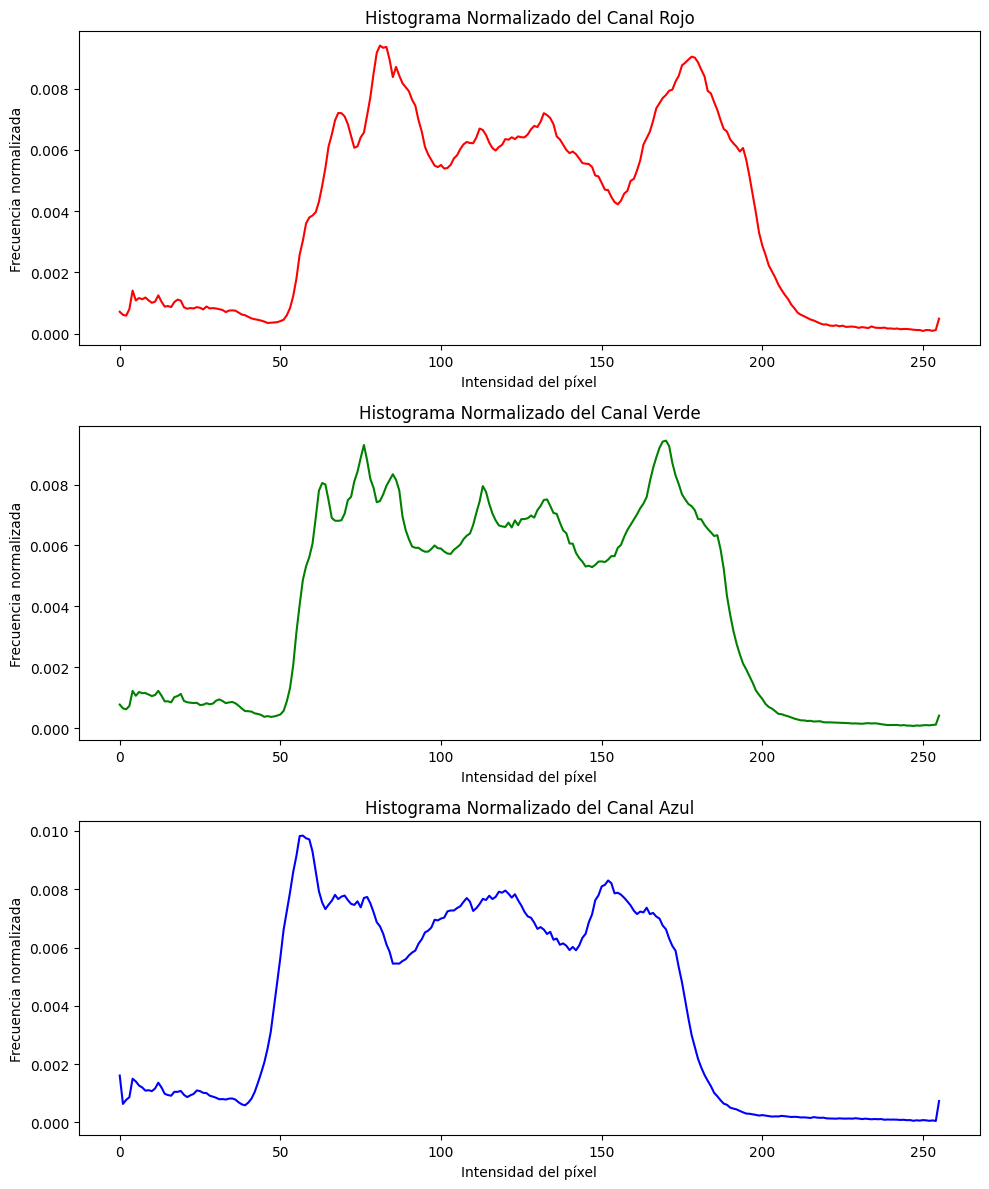

In [6]:
claro_hist_r_normalized_np, claro_hist_g_normalized_np, claro_hist_b_normalized_np = get_normalized_histograms_from_image(vaso_claro_path)

#### Imagen Obscura

![Oscuro](vaso_oscuro.jpg)

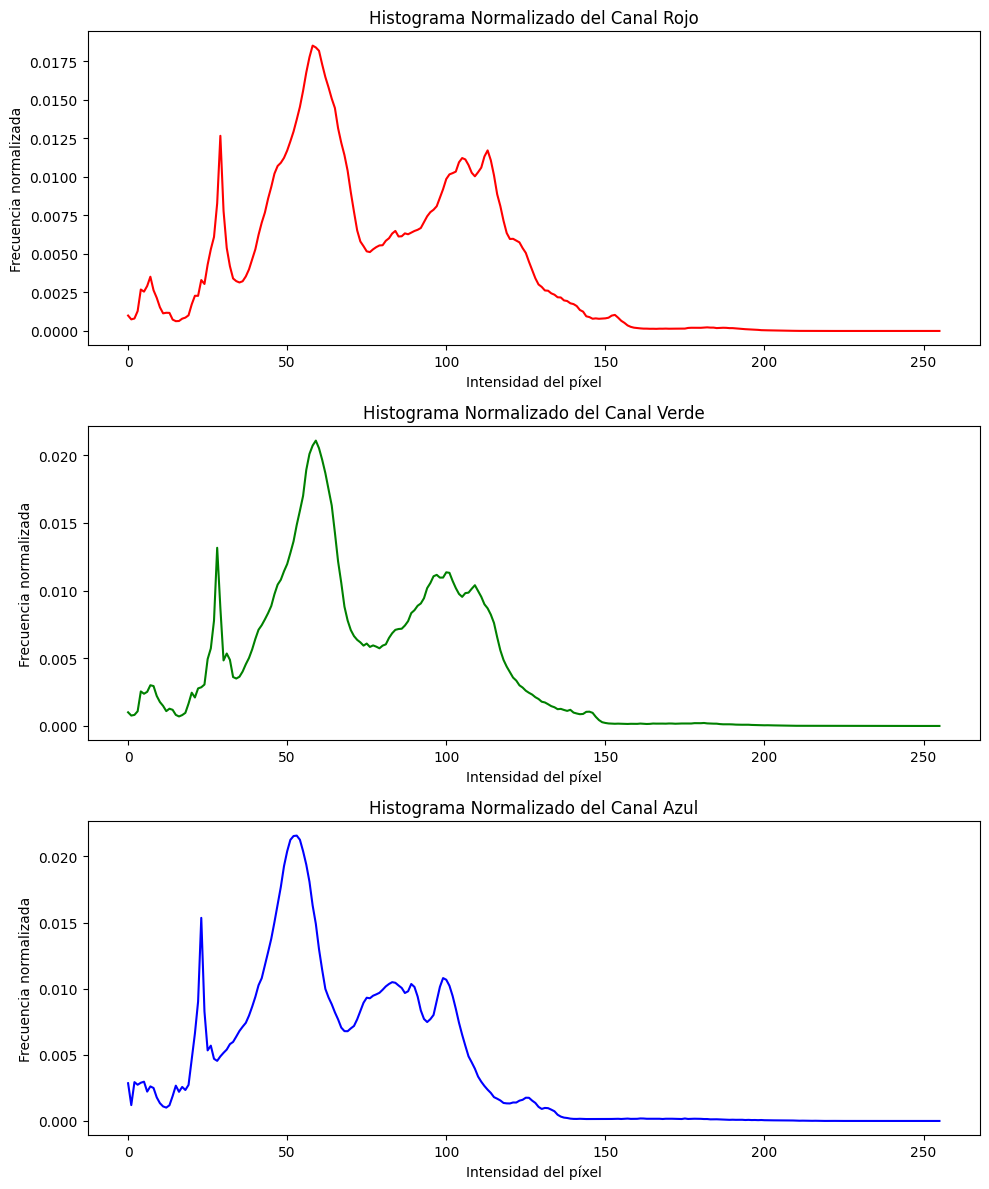

In [7]:
obscuro_hist_r_normalized_np, obscuro_hist_g_normalized_np, obscuro_hist_b_normalized_np = get_normalized_histograms_from_image(vaso_oscuro_path)

### 2.2 Distancia que compare dos histogramas

Como grupo decidimos utilizar como distancia la distancia euclidiana entre los histogramas normalizados por cada color y luego encontrar el promedio de las distancias entre los tres colores.


In [8]:
def EuclideanDistance(array1, array2):
    return np.linalg.norm(array1 - array2)


### 2.3 Comparar distancias


In [9]:
red_distance_vasos = EuclideanDistance(claro_hist_r_normalized_np, obscuro_hist_r_normalized_np)
green_distance_vasos = EuclideanDistance(claro_hist_g_normalized_np, obscuro_hist_g_normalized_np)
blue_distance_vasos = EuclideanDistance(claro_hist_b_normalized_np, obscuro_hist_b_normalized_np)

mean_distance_vasos = (red_distance_vasos + green_distance_vasos + blue_distance_vasos) / 3

print("Distancia Euclidiana entre las imágenes del vaso: ", mean_distance_vasos)

Distancia Euclidiana entre las imágenes del vaso:  0.08309024608825726


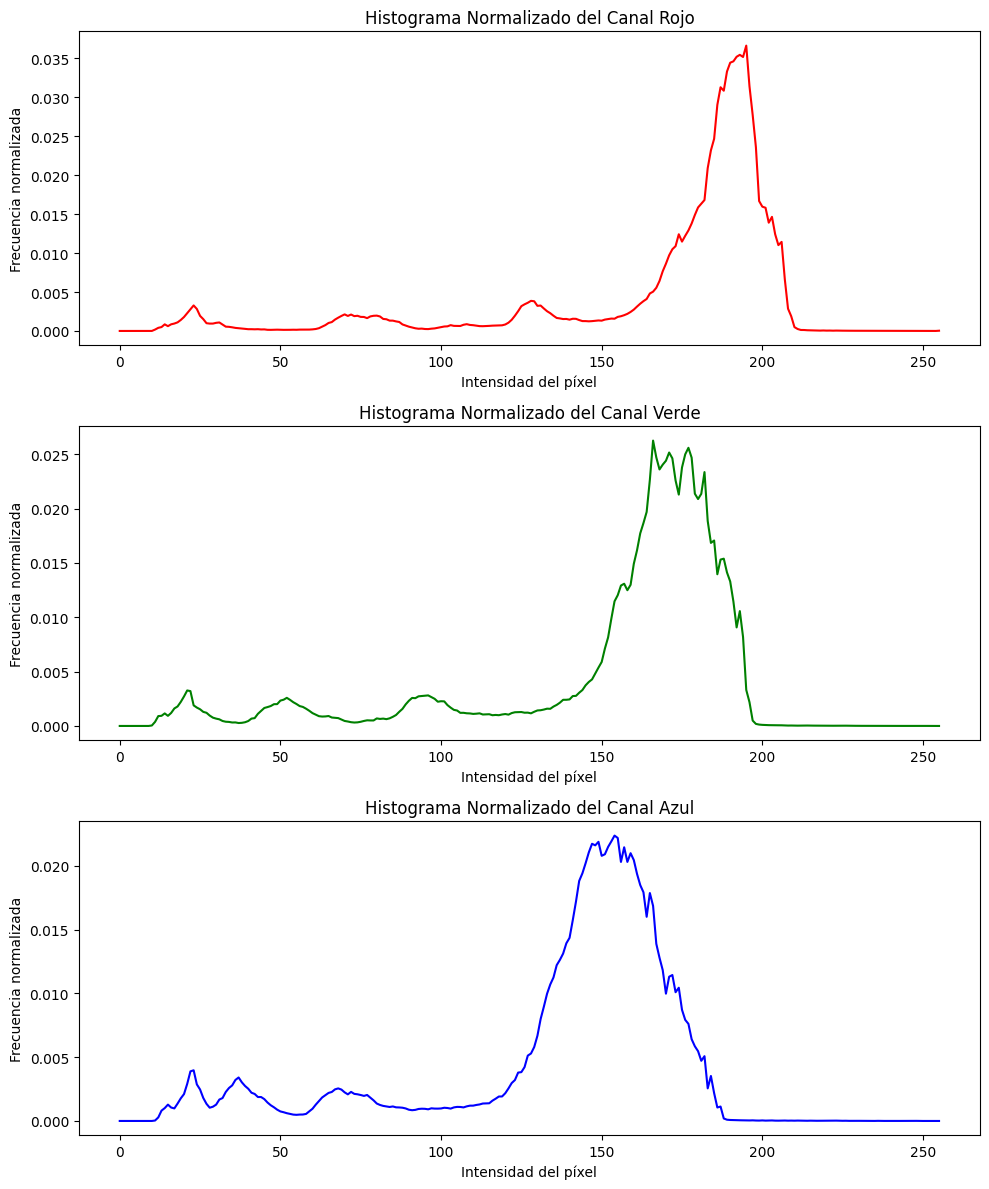

In [10]:
arena_hist_r_normalized_np, arena_hist_g_normalized_np, arena_hist_b_normalized_np = get_normalized_histograms_from_image("arena.jpg")

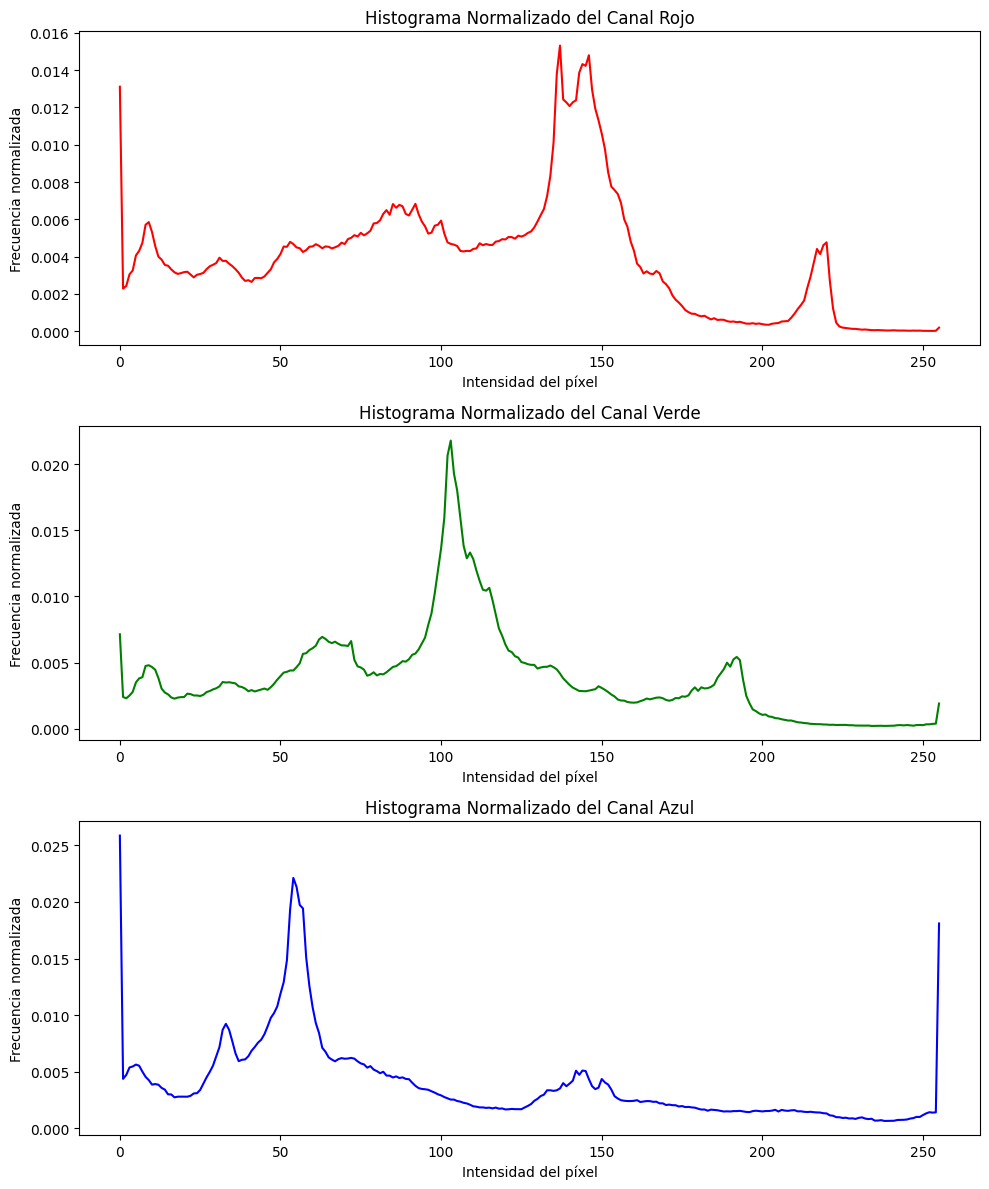

In [11]:
partido_hist_r_normalized_np, partido_hist_g_normalized_np, partido_hist_b_normalized_np = get_normalized_histograms_from_image("partido.jpg")

### Distancias con fotos distintas

In [12]:
red_distance_vaso_arena = EuclideanDistance(arena_hist_r_normalized_np, claro_hist_r_normalized_np)
green_distance_vaso_arena = EuclideanDistance(arena_hist_g_normalized_np, claro_hist_g_normalized_np)
blue_distance_vaso_arena = EuclideanDistance(arena_hist_b_normalized_np, claro_hist_b_normalized_np)

mean_distance_vaso_arena = (red_distance_vaso_arena + green_distance_vaso_arena + blue_distance_vaso_arena) / 3

print("Distancia Euclidiana entre las imágenes de vaso claro y reloj de arena: ", mean_distance_vaso_arena)

Distancia Euclidiana entre las imágenes de vaso claro y reloj de arena:  0.10051810229945402


In [13]:
red_distance_vaso_partido = EuclideanDistance(partido_hist_r_normalized_np, claro_hist_r_normalized_np)
green_distance_vaso_partido = EuclideanDistance(partido_hist_g_normalized_np, claro_hist_g_normalized_np)
blue_distance_vaso_partido = EuclideanDistance(partido_hist_b_normalized_np, claro_hist_b_normalized_np)

mean_distance_vaso_partido = (red_distance_vaso_partido + green_distance_vaso_partido + blue_distance_vaso_partido) / 3

print("Distancia Euclidiana entre las imágenes de vaso claro y partido: ", mean_distance_vaso_partido)

Distancia Euclidiana entre las imágenes de vaso claro y partido:  0.0600143479596248


### 2.4 Convertir de RGB a HSV


In [14]:
def Convert_RGB_HSV(imagen_rgb):
    return imagen_rgb.convert('HSV')

In [15]:
def resize_image(imagen, width, height):
    return imagen.resize((width, height), Image.ANTIALIAS)

In [16]:
vaso_claro_hsv = Convert_RGB_HSV(Image.open(vaso_claro_path))
vaso_oscuro_hsv = Convert_RGB_HSV(Image.open(vaso_oscuro_path))

width, height = vaso_claro_hsv.size

arena_hsv = Convert_RGB_HSV(Image.open("arena.jpg"))
arena_hsv = resize_image(arena_hsv, width, height)

partido_hsv = Convert_RGB_HSV(Image.open("partido.jpg"))
partido_hsv = resize_image(partido_hsv, width, height)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_23360\1102587398.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  return imagen.resize((width, height), Image.ANTIALIAS)


### 2.5 Construir histogramas HSV

In [17]:
def HSV_HIStogram(imagen_hsv):
    
    array_hsv = np.array(imagen_hsv)
    
    h_values = array_hsv[:, :, 0].ravel()
    s_values = array_hsv[:, :, 1].ravel()

    # Crear histogramas para H y S
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(h_values, bins=256, range=(0, 256), color='blue', alpha=0.7)
    plt.title('Histograma de H (Hue)')
    plt.xlabel('Valor de H')
    plt.ylabel('Frecuencia')

    plt.subplot(1, 2, 2)
    plt.hist(s_values, bins=256, range=(0, 256), color='green', alpha=0.7)
    plt.title('Histograma de S (Saturation)')
    plt.xlabel('Valor de S')
    plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()
    
    return h_values, s_values

####  Histograma HSV de la imagen vaso claro

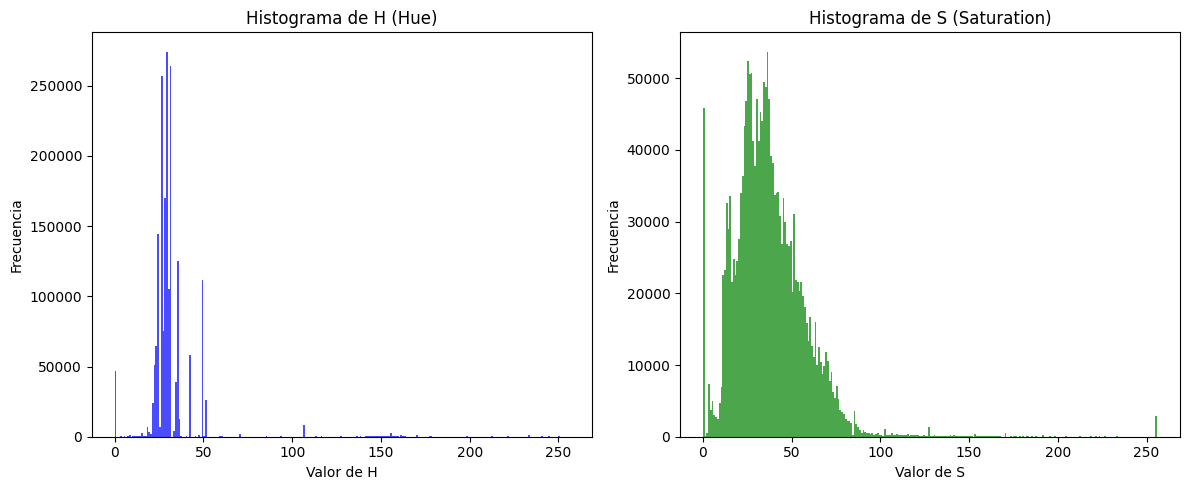

In [18]:
h_values_vaso_claro, s_values_vaso_claro = HSV_HIStogram(vaso_claro_hsv)

#### Histograma HSV de la imagen vaso oscuro

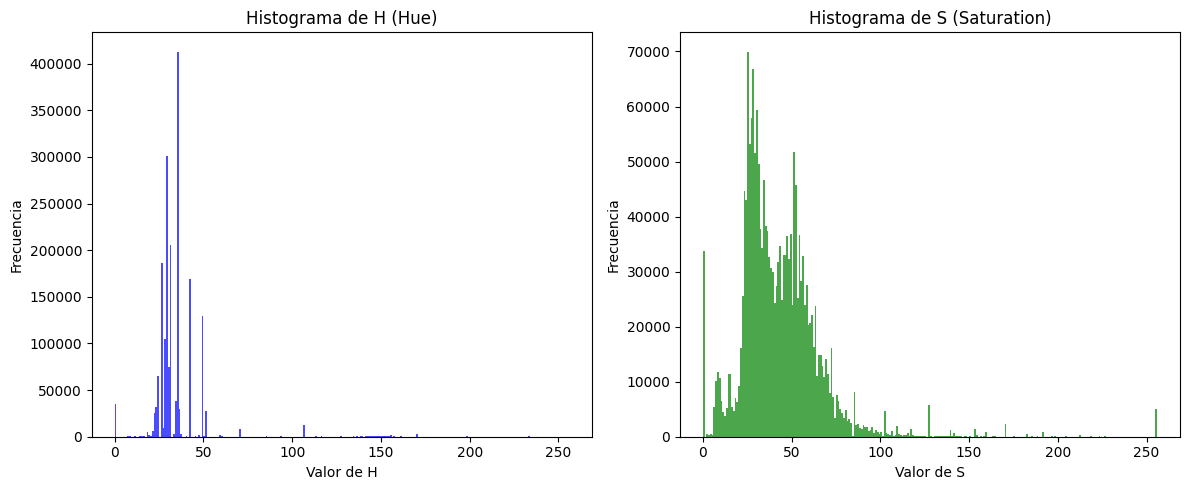

In [19]:
h_values_vaso_oscuro, s_values_vaso_oscuro = HSV_HIStogram(vaso_oscuro_hsv)


#### Histograma HSV de la imagen reloj de arena

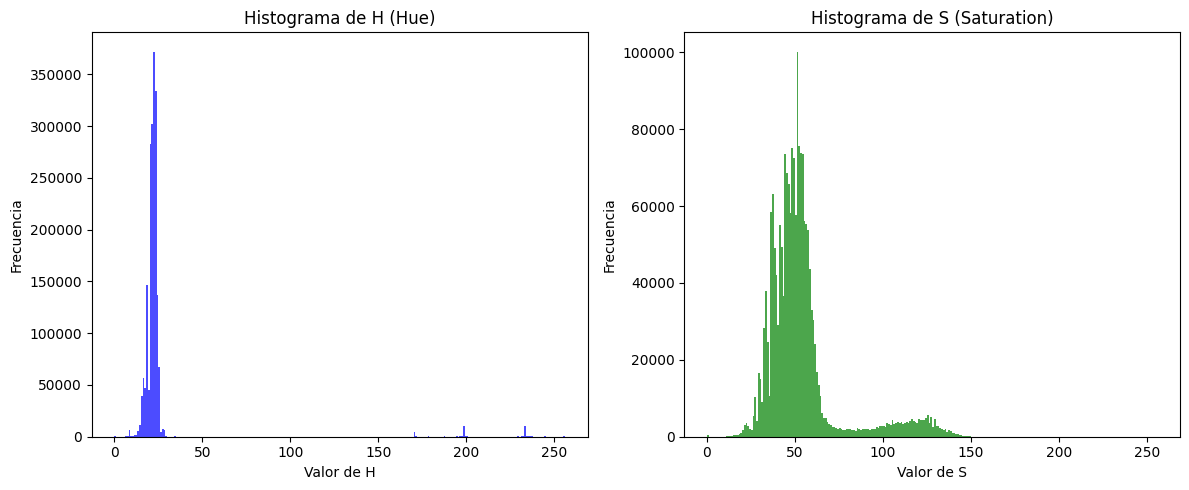

In [20]:
h_values_arena, s_values_arena = HSV_HIStogram(arena_hsv)

#### Histograma HSV de la imagen partido


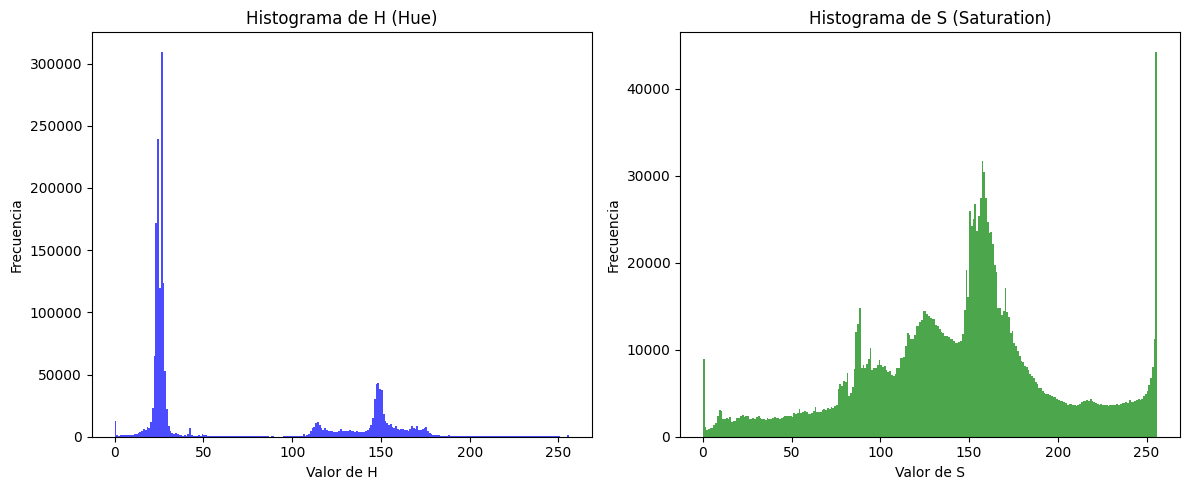

In [21]:
h_values_partido, s_values_partido = HSV_HIStogram(partido_hsv)

### Comparación de distancias con HSV

In [22]:
h_distance_vasos = EuclideanDistance(h_values_vaso_claro, h_values_vaso_oscuro)
s_distance_vasos = EuclideanDistance(s_values_vaso_claro, s_values_vaso_oscuro)

mean_distance_vasos_hsv = (h_distance_vasos + s_distance_vasos) / 2

print("Distancia Euclidiana entre las imágenes del vaso en HSV: ", mean_distance_vasos_hsv)

Distancia Euclidiana entre las imágenes del vaso en HSV:  253374.61170028913


In [23]:
h_distance_vaso_arena = EuclideanDistance(h_values_vaso_claro, h_values_arena)
s_distance_vaso_arena = EuclideanDistance(s_values_vaso_claro, s_values_arena)

mean_distance_vaso_arena_hsv = (h_distance_vaso_arena + s_distance_vaso_arena) / 2

print("Distancia Euclidiana entre las imágenes del vaso claro y reloj de arena en HSV: ", mean_distance_vaso_arena_hsv)

Distancia Euclidiana entre las imágenes del vaso claro y reloj de arena en HSV:  183731.59760517685


In [24]:
h_distance_vaso_partido = EuclideanDistance(h_values_vaso_claro, h_values_partido)
s_distance_vaso_partido = EuclideanDistance(s_values_vaso_claro, s_values_partido)

mean_distance_vaso_partido_hsv = (h_distance_vaso_partido + s_distance_vaso_partido) / 2

print("Distancia Euclidiana entre las imágenes del vaso claro y partido en HSV: ", mean_distance_vaso_partido_hsv)

Distancia Euclidiana entre las imágenes del vaso claro y partido en HSV:  187980.61568030185


## Ejercicio 3

In [25]:
def open_image(path):
    return np.array(Image.open(path))

In [26]:
def get_gray_scale_image(image):
    image = open_image(image)
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [27]:
def equalize_histogram(image):
    if isinstance(image, str):
        image = np.array(Image.open(image))
    else:
        image = image
        
    histogram, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    num_pixels = np.prod(image.shape[:2])
    normalized_histogram = normalize_histogram(histogram, num_pixels)
    
    cumulative_histogram = np.cumsum(normalized_histogram)

    equalized_histogram = np.round(cumulative_histogram * 255).astype(np.uint8)

    equalized_image = equalized_histogram[image]

    return equalized_histogram, normalized_histogram, image

In [28]:
def get_equalized_image(image):
    equalized_histogram, _, _ = equalize_histogram(image)
    equalized_image = equalized_histogram[image]
    
    return equalized_image

### Algoritmo propio

In [29]:
image_path = "grayscale.jpg"
image_to_equalize = get_gray_scale_image(image_path)
equalized_image = get_equalized_image(image_to_equalize)
image_histogram, _ = np.histogram(image_to_equalize.flatten(), bins=256, range=[0, 256])
normalized_original_histogram = normalize_histogram(image_histogram, np.prod(image_to_equalize.shape[:2]))
equalized_image_histogram, _ = np.histogram(equalized_image.flatten(), bins=256, range=[0, 256])
normalized_equalized_image_histogram = normalize_histogram(equalized_image_histogram, np.prod(equalized_image.shape[:2]))

cumulative_distribution_original = np.cumsum(normalized_original_histogram)
cumulative_distribution_equalized = np.cumsum(normalized_equalized_image_histogram)

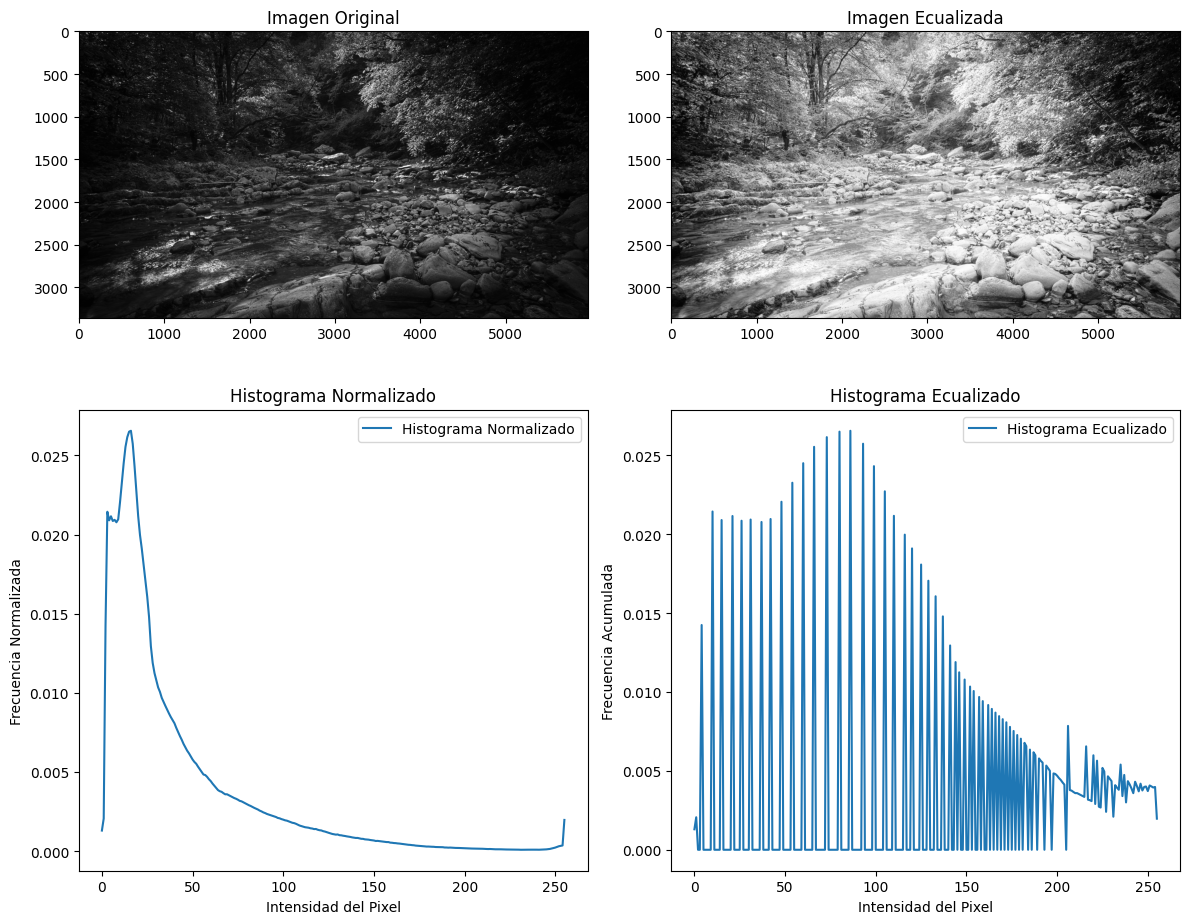

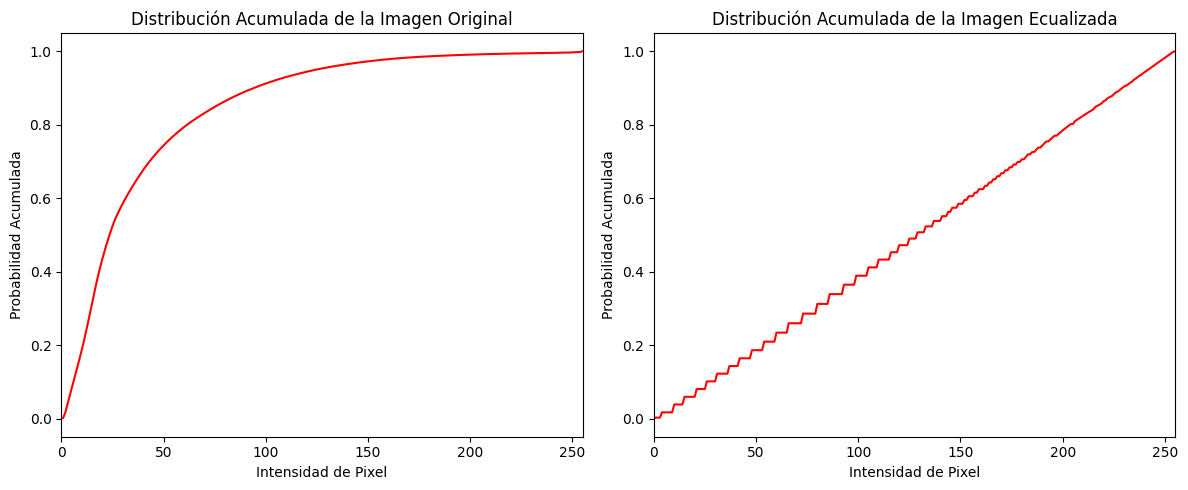

In [30]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.imshow(image_to_equalize, cmap='gray')
plt.title('Imagen Original')

plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Imagen Ecualizada')

plt.subplot(2, 2, 3)
plt.plot(normalized_original_histogram, label='Histograma Normalizado')
plt.title('Histograma Normalizado')
plt.xlabel('Intensidad del Pixel')
plt.ylabel('Frecuencia Normalizada')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(normalized_equalized_image_histogram, label='Histograma Ecualizado')
plt.title('Histograma Ecualizado')
plt.xlabel('Intensidad del Pixel')
plt.ylabel('Frecuencia Acumulada')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cumulative_distribution_original, color='red')
plt.title("Distribución Acumulada de la Imagen Original")
plt.xlabel("Intensidad de Pixel")
plt.ylabel("Probabilidad Acumulada")
plt.xlim([0, 255])

plt.subplot(1, 2, 2)
plt.plot(cumulative_distribution_equalized, color='red')
plt.title("Distribución Acumulada de la Imagen Ecualizada")
plt.xlabel("Intensidad de Pixel")
plt.ylabel("Probabilidad Acumulada")
plt.xlim([0, 255])

plt.tight_layout()
plt.show()

### Open CV

In [31]:
equalized_image_cv = cv2.equalizeHist(image_to_equalize)
histogram_equalized_cv = cv2.calcHist([equalized_image_cv], [0], None, [256], [0, 256])
normalized_equalized_histogram_cv = histogram_equalized_cv / np.prod(equalized_image.shape[:2])

cumulative_distribution = np.cumsum(normalized_equalized_histogram_cv)

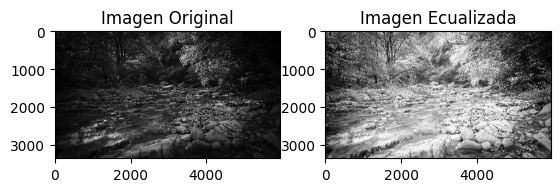

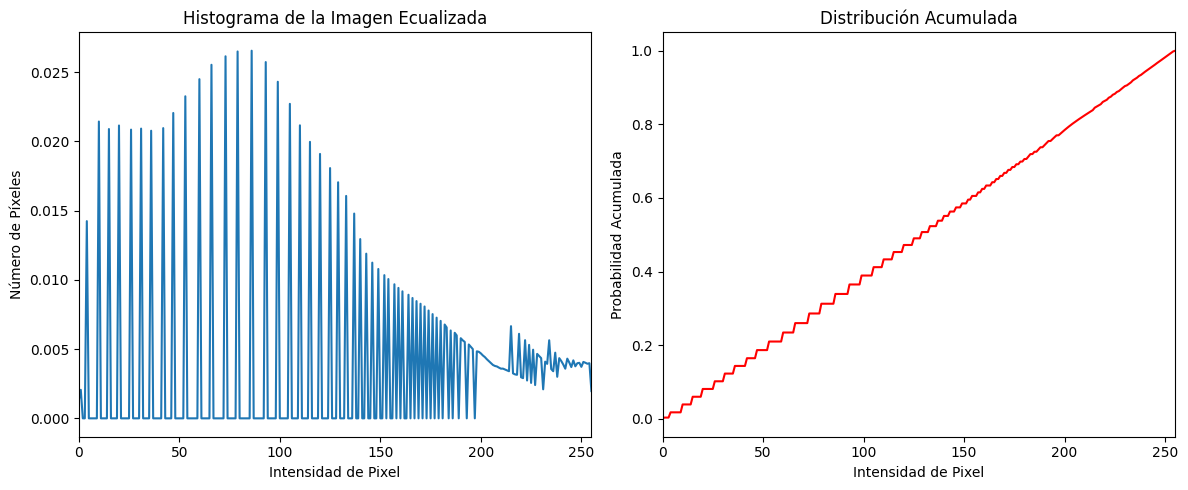

In [32]:
plt.subplot(2, 2, 1)
plt.imshow(image_to_equalize, cmap='gray')
plt.title('Imagen Original')

plt.subplot(2, 2, 2)
plt.imshow(equalized_image_cv, cmap='gray')
plt.title('Imagen Ecualizada')


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Histograma de la Imagen Ecualizada")
plt.xlabel("Intensidad de Pixel")
plt.ylabel("Número de Píxeles")
plt.plot(normalized_equalized_histogram_cv)
plt.xlim([0, 255])

plt.subplot(1, 2, 2)
plt.title("Distribución Acumulada")
plt.xlabel("Intensidad de Pixel")
plt.ylabel("Probabilidad Acumulada")
plt.plot(cumulative_distribution, color='red')
plt.xlim([0, 255])

plt.tight_layout()
plt.show()

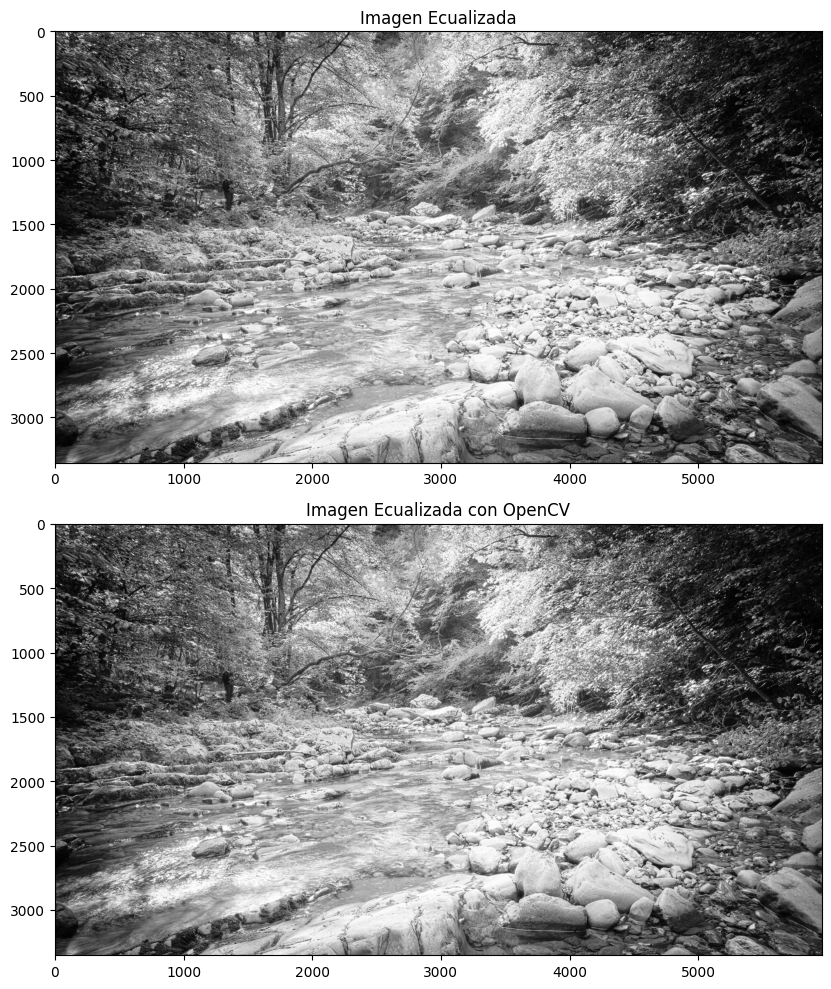

In [33]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('Imagen Ecualizada')

plt.subplot(2, 1, 2)
plt.imshow(equalized_image_cv, cmap='gray')
plt.title('Imagen Ecualizada con OpenCV')

plt.tight_layout()
plt.show()

In [34]:
distance_equalized_histograms = EuclideanDistance(np.array(normalized_equalized_image_histogram), np.array(normalized_equalized_histogram_cv))
print("Distancia Euclidiana entre los histogramas de la imagen original y la ecualizada: ", distance_equalized_histograms)

Distancia Euclidiana entre los histogramas de la imagen original y la ecualizada:  2.3511494995596327


Al observar la distancia euclideana entre los histogramas normalizados de las imágenes, se puede observar una ligera diferencia entre ambos, debido a que el score es de 2.35. Sin embargo, al comparar las imagenes visualmente, se observa que son muy similares, aunque en OpenCV se observa algunas áreas más oscuras que en la imagen equalizada por el algoritmo propio. Este error se puede deber a diferencias entre ambos algoritmos, como cuestiones de redondeo o de la forma en que se calcula el histograma.

### Implementación de 3 algoritmos de segmentación binaria

In [35]:
image_path = "mickey.jpg"
image = get_gray_scale_image(image_path)
ruta_guardar = 'mickey_gris.jpg'
cv2.imwrite(ruta_guardar, image)


True

In [36]:
def mostrar_rango(imagen_gris):
    valor_minimo = np.min(imagen_gris)
    valor_maximo = np.max(imagen_gris)
    
    plt.imshow(imagen_gris, cmap='gray')
    plt.title('Imagen en Escala de Grises')
    cbar = plt.colorbar(ticks=[valor_minimo, valor_maximo], orientation='vertical')
    cbar.set_label('Niveles de Gris', rotation=270, labelpad=15)
    plt.show()


In [1]:
def adaptive_thresholding(threshold, image, threshold_delta=10, max_iterations=100):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Itera hasta que se alcance el número máximo de iteraciones o hasta que el umbral converge
    for i in range(max_iterations):
        # Binariza la imagen usando el umbral actual
        binary_image = (image > threshold).astype(np.uint8) * 255

        # Calcula el nuevo umbral como el promedio de los píxeles de fondo y primer plano
        new_threshold = 0.5 * (np.mean(image[binary_image == 0]) + np.mean(image[binary_image != 0]))
        print(new_threshold)
        # Verifica si el cambio en el umbral es menor que el umbral de delta
        if np.abs(new_threshold - threshold) < threshold_delta:
            break

        threshold = new_threshold

    return binary_image, threshold

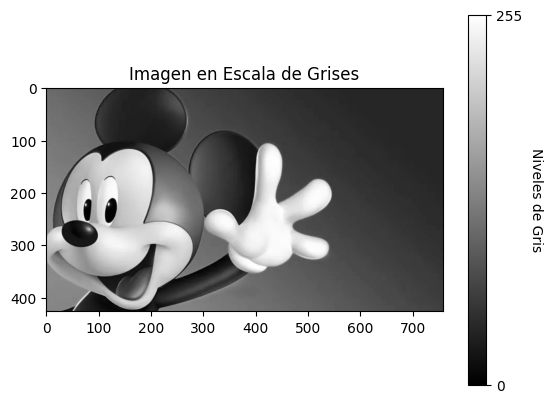

In [38]:
# Lee la imagen

threshold = input('Ingresa el umbral inicial: ')
image_path = 'mickey_gris.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

mostrar_rango(image)



In [39]:
# Aplica la binarización adaptativa iterativa
block_size = 15
threshold = int(input('Ingresa el umbral inicial: '))
binary_image = adaptive_thresholding(threshold, image)

# Muestra la imagen original y la binarizada
cv2.imshow('Imagen Original', image)
cv2.imshow('Binarización Adaptativa Iterativa', binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

57.078128680475466
86.39156354718321
108.81362911428886
120.64643064441773
128.92780444483
